In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import ancova, ttest

Need to Do for Gender and Race:

1. Identify first and last authors
2. Identify first and last name separately for each
3. Run first name through genderize and output %male to column
4. Run last name through ethnicolr and output % of 5 race categories to columns

Comparisons & Visualizations
1. Histogram of average race estimates for (1) Page 1 Relevance (2) Page 2 Relevance (3) Page 1 Date sort (4) Page 2 Date Sort
2. t-test between each race for (1) vs (2) and (1) vs (3)
3. Same as 1 & 2 for gender (keeping in mind we only get 1000 genders per IP per day)

"Biomedical Triangle" Analysis
1. Stacked bargraphs of human, animal, and molecular_cellular for (1) vs (2) and (1) vs (3)

Journal Analysis (Team 3 is working on this)
1. Top 3 most frequent journals in (1) vs (2) and (1) vs (3)
2. Use Nature Index to get average index score for (1) vs (2) and (1) vs (3)

Country Analysis
1. Top 5 most frequent journals in (1) vs (2) and (1) vs (3)

In [2]:
data = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/out/pmid_data.csv')

In [3]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)

In [4]:
relevance_data = data[data['search_type'] == 'relevance']
pubdate_desc_data = data[data['search_type'] == 'pubdate_desc']

In [5]:
relevance_data

,pmid,query,search_type,page,relative_citation_ratio,human,animal,molecular_cellular,apt,is_clinical,citation_count,cited_by,references,title,abstract,journal,authors,affiliations,pubdate,mesh_terms,publication_types,chemical_list,keywords,languages,country
0,19297575,Moyamoya,relevance,1,29.60,1.0,0.0,0.0,0.95,No,891.0,"[33953833, 30196169, 34079508, 35210461, 27113...","[11390315, 10724101, 6823678, 11197712, 102350...",Moyamoya disease and moyamoya syndrome.,NaN,The New England journal of medicine,Scott|R Michael|RM|;Smith|Edward R|ER|,"Department of Neurosurgery, Children's Hospita...",2009.0,D000328:Adult; D000367:Age Factors; D000792:An...,D016428:Journal Article; D016454:Review,NaN,NaN,eng,United States
1,29911252,Moyamoya,relevance,1,9.28,1.0,0.0,0.0,0.95,No,30.0,"[34370351, 34248815, 32499749, 35102703, 32153...","[22020027, 1282678, 5554209, 9409399, 23445954...",Progress in moyamoya disease.,Moyamoya disease is characterized by progressi...,Neurosurgical review,Shang|Shuling|S|;Zhou|Da|D|;Ya|Jingyuan|J|;Li|...,"Departments of Neurology, Radiology and Neuros...",2020.0,D006801:Humans; D009072:Moyamoya Disease; D009...,D016428:Journal Article; D016454:Review,NaN,Clinical features; Diagnosis; Epidemiology; Mo...,eng,Germany
2,27960175,Moyamoya,relevance,1,2.81,1.0,0.0,0.0,0.95,No,41.0,"[33840794, 33594841, 33997029, 34804992, 32499...","[22020027, 18066556, 17138018, 11390315, 23445...",Moyamoya Disease.,Moyamoya disease (MMD) is a chronic occlusive ...,Frontiers of neurology and neuroscience,Fujimura|Miki|M|;Bang|Oh Young|OY|;Kim|Jong S|JS|,NaN,2016.0,D017115:Catheter Ablation; D006801:Humans; D00...,D016428:Journal Article; D016454:Review,NaN,NaN,eng,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,33579819,literacy skills,relevance,2,NaN,1.0,0.0,0.0,0.25,No,2.0,"[34580226, 34625495]","[24302530, 21738556, 18292326]",Skills-adjusted human capital shows rising glo...,"Human capital, broadly defined as the skills a...",Proceedings of the National Academy of Science...,Lutz|Wolfgang|W|;Reiter|Claudia|C|0000-0002-14...,"Department of Demography, University of Vienna...",2021.0,D000328:Adult; D003710:Demography; D019049:Dev...,D016428:Journal Article; D013485:Research Supp...,NaN,cross-country analysis; demography; education;...,eng,United States
7184,31724817,literacy skills,relevance,2,NaN,1.0,0.0,0.0,0.05,No,1.0,[32615641],"[29904512, 31596540]",Integrating scientific literacy skills into a ...,One of the goals for requiring all college stu...,Biochemistry and molecular biology education :...,Taylor|Ann T S|ATS|0000-0002-9594-8501,"Chemistry Department, Wabash College, Crawford...",2020.0,D001671:Biochemistry; D003479:Curriculum; D004...,D016428:Journal Article,NaN,biochemistry for nonscience majors; curriculum...,eng,United States
7185,32106252,literacy skills,relevance,2,0.00,1.0,0.0,0.0,0.05,No,0.0,[],"[23278922, 29660589, 17642366, 24911049, 27789...",Early visual language skills affect the trajec...,Previous research has established a correlatio...,PloS one,Allen|Thomas E|TE|0000-0002-1545-8853;Morere|D...,Science of Learning Center on Visual Language ...,2020.0,D002648:Child; D002663:Child Language; D002675...,D016428:Journal Article; D013486:Research Supp...,NaN,NaN,eng,United States


Because RCR works only for papers published earlier than 2021, it will not be possible to compare RCR between relevance and publication date. Will see if average RCR is different between first and second page

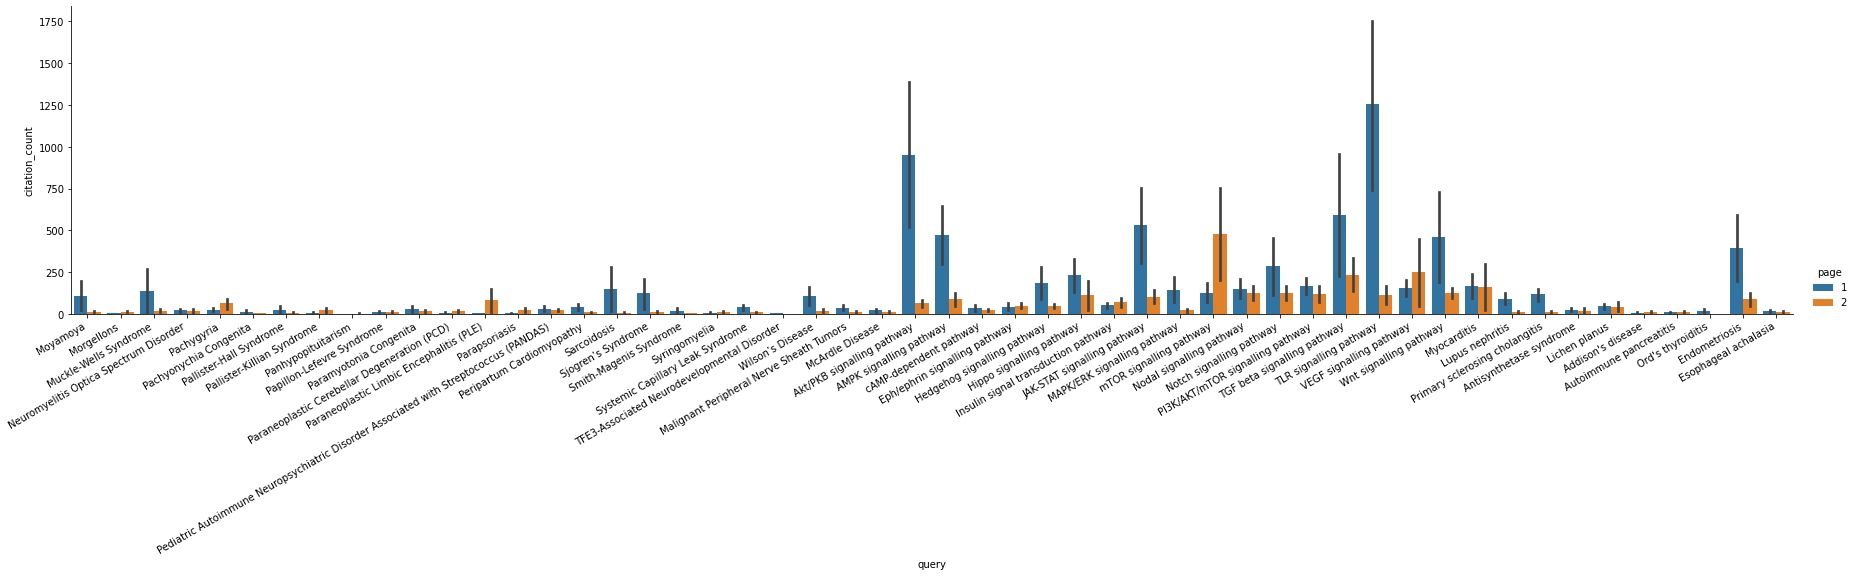

In [21]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[:1000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')